# Across Timestamps - Data_16_11_2024 - Latest As of with Created At & Updated At & Static - Only Updations , Dynamic - Updations & Deletions 

In [1]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/home/rm_subhiksha/LAM_SRM/Query_jsongraph/static_100_large.zip'

# Directory to extract to
extract_dir = '/home/rm_subhiksha/LAM_SRM/Query_jsongraph'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')


Files extracted to /home/rm_subhiksha/LAM_SRM/Query_jsongraph


In [3]:
# Decompressing the Dataset - Data_16_11_2024 - Single Timestamps

import json
import os

def decompress_schema(compressed_data):
    decompressed = {
        "directed": compressed_data["directed"],
        "multigraph": compressed_data["multigraph"],
        "graph": compressed_data["graph"],
        "nodes": [],
        "links": []
    }
    
    # Decompress nodes
    for node_type, keys in compressed_data["node_types"].items():
        for values in compressed_data["node_values"][node_type]:
            node = dict(zip(keys, values))
            decompressed["nodes"].append(node)
    
    # Decompress links
    for values in compressed_data["link_values"]:
        rel_type = values[0]  # Assuming relationship_type is always first
        keys = compressed_data["relationship_types"][rel_type]
        link = dict(zip(keys, values))
        decompressed["links"].append(link)
    
    return decompressed

def process_json_files(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        if filename.endswith(".json"):
            input_path = os.path.join(input_folder, filename)
            with open(input_path, 'r') as file:
                compressed_data = json.load(file)
            
            decompressed_data = decompress_schema(compressed_data)
            
            output_path = os.path.join(output_folder, filename)
            with open(output_path, 'w') as file:
                json.dump(decompressed_data, file, indent=4)

# Example usage
input_folder = '/home/rm_subhiksha/LAM_SRM/Query_jsongraph/static_100_large'
output_folder = '/home/rm_subhiksha/LAM_SRM/Query_jsongraph/static_100_large_dc'
process_json_files(input_folder, output_folder)


# Dataset - Schema - What to Query? 

Business Unit 

"nodes": [
        {
            "node_type": "BusinessUnit",
            "created_at": 0,
            "updated_at": 0,
            "name": "zdJPKAgC",
            "description": "nXeqjYXZ",
            "revenue": 748.15,
            "id": "1"
        },]

Product Family  
        {
            "node_type": "ProductFamily",
            "created_at": 0,
            "updated_at": 0,
            "name": "pVwSzyzv",
            "revenue": 205.71,
            "id": "2-3"
        },

Product Offering
        {
            "node_type": "ProductOffering",
            "created_at": 0,
            "updated_at": 0,
            "name": "MYZifQMl",
            "cost": 143.62,
            "demand": 43,
            "id": "2-2-2"
        },

Facility
        {
            "node_type": "Facility",
            "created_at": 0,
            "updated_at": 0,
            "name": "KDNtKtrF",
            "type": "GdVywCNV",
            "location": "nsVIYWPS",
            "max_capacity": 98,
            "operating_cost": 882.31,
            "id": "1-1-2-3"
        },

Parts
 {
            "node_type": "Parts",
            "created_at": 0,
            "updated_at": 0,
            "name": "ZfVKjEQK",
            "description": "FrlTYlhK",
            "type": "VIkAdtVd",
            "cost": 565.6,
            "importance": 17,
            "expected_life": 38,
            "units_in_chain": 72,
            "expiry": 22,
            "id": "20-1-1-2-2"
        },

Supplier 
        {
            "node_type": "Supplier",
            "created_at": 0,
            "updated_at": 0,
            "name": "AqniJjeQ",
            "location": "fErBrPpI",
            "reliability": 519.38,
            "size": "HXcnGUmk",
            "id": "18917838-7a79-454f-b6b1-7cf002ac91d8"
        },

Warehouse
        {
            "node_type": "Warehouse",
            "created_at": 0,
            "updated_at": 0,
            "name": "nAXydUIs",
            "type": "hoCpOXZO",
            "size": "ZEsmuUoE",
            "location": "JBSestQN",
            "max_capacity": 26,
            "current_capacity": 32,
            "safety_stock": 96,
            "id": "10c8d9b3-aa0d-4f85-9587-3c8a53fcdc3a"
        }

Links : Edge Properties
 {
            "relationship_type": "ProductFamiliesToBusinessUnit",
            "created_at": 0,
            "updated_at": 0,
            "source": "1-1",
            "target": "1"
        },
 
 {
            "relationship_type": "ProductOfferingsToProductFamilies",
            "created_at": 0,
            "updated_at": 0,
            "source": "2-2-3",
            "target": "2-3"
        },
        {
            "relationship_type": "FacilityToProductOfferings",
            "created_at": 0,
            "updated_at": 0,
            "product_cost": 299.34,
            "lead_time": 39,
            "quantity_produced": 72,
            "source": "1-1-1-1",
            "target": "1-1-1"
        },
          {
            "relationship_type": "PartsToFacility",
            "created_at": 0,
            "updated_at": 0,
            "quantity": 90,
            "distance_from_warehouse": 880.55,
            "transport_cost": 376.96,
            "lead_time": 73,
            "source": "1-1-1-1-1",
            "target": "1-1-1-1"
        },
         {
            "relationship_type": "SupplierToWarehouse",
            "created_at": 0,
            "updated_at": 0,
            "transportation_cost": 499.1,
            "lead_time": 67,
            "source": "06df49f7-157a-4077-9e4d-9cdf8c2dfc42",
            "target": "10c8d9b3-aa0d-4f85-9587-3c8a53fcdc3a"
        },
                {
            "relationship_type": "WarehouseToParts",
            "created_at": 0,
            "updated_at": 0,
            "inventory_level": 80,
            "storage_cost": 40.32,
            "source": "c9f71cb1-d250-4019-985c-0794968f8141",
            "target": "4-2-1-1-2"
        },

# Queries: 

1. How the Cost of all the parts making up a Business Unit changes from one timestamp to another?

2. Total revenue consumed for a Product Family in 30 days? : Revenue of Business Units, Cost of Product Offering , Cost of Parts belonging to a particular Product family

In [12]:
import json
import networkx as nx
import os
import time
import psutil
from datetime import datetime, timedelta
from functools import lru_cache

def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 ** 2)  # bytes to MB conversion

start_time = time.time()
start_memory = memory_usage()

@lru_cache(maxsize=None)     # caching the read json files for easy access when the function called next time. maxsize=None -- menas no limit to caching memory.
def load_json_file(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def load_and_build_graph(folder_path):
    graphs = []
    files_without_values = []
    parsed_files = set()

    # Load and build a directed graph from multiple JSON files in the folder
    for i, file_name in enumerate(os.listdir(folder_path)):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            graph_data = load_json_file(file_path)
            G = nx.DiGraph()
            for node in graph_data['nodes']:
                G.add_node(node['id'], **node)
            for edge in graph_data['links']:
                G.add_edge(edge['source'], edge['target'], **edge)
            graphs.append((G, file_path))
            parsed_files.add(file_name)
            print(f"Graph {i+1} built from {file_path}: Nodes={G.number_of_nodes()}, Edges={G.number_of_edges()}")

    return graphs, files_without_values, parsed_files

def find_best_product_offering(graphs):
    best_product_offering = None
    max_demand = 0
    files_without_values = []

    # Iterate through each graph to find the product offering with max demand
    for i, (G, file_path) in enumerate(graphs):
        local_best_product_offering = None
        local_max_demand = 0
        for node_id, node_data in G.nodes(data=True):
            if node_data.get('node_type') == 'ProductOffering' and node_data.get('demand', 0) > local_max_demand:
                local_max_demand = node_data['demand']
                local_best_product_offering = (node_data['name'], node_id, node_data['cost'], node_data['demand'])
        
        # Display the result for the current graph
        if local_best_product_offering:
            print(f"Best Product Offering in graph {i+1} (built from {file_path}): Name={local_best_product_offering[0]}, ID={local_best_product_offering[1]}, Cost={local_best_product_offering[2]}, Demand={local_best_product_offering[3]}")
        else:
            print(f"Product offering with max demand does not exist in graph {i+1} (built from {file_path})")
            files_without_values.append(file_path)

        # Update the overall best product offering if the local one is better
        if local_max_demand > max_demand:
            max_demand = local_max_demand
            best_product_offering = local_best_product_offering

    return best_product_offering, files_without_values

# Example usage
folder_path = '/home/rm_subhiksha/LAM_SRM/Query_jsongraph/Data_16_11_2024/Multi_TS_DC/dynamic_v10'
graphs, files_without_values_initial, parsed_files = load_and_build_graph(folder_path)
result, files_without_values_final = find_best_product_offering(graphs)

# Check if all JSON files are parsed
all_files_parsed = set(os.listdir(folder_path)) == parsed_files

if result:
    print(f"Best Product Offering Overall: Name={result[0]}, ID={result[1]}, Cost={result[2]}, Demand={result[3]}")
else:
    print("No product offering found.")

if files_without_values_final:
    print("Files without the required values:")
    for file_name in files_without_values_final:
        print(file_name)

print(f"All JSON files parsed: {all_files_parsed}")

end_memory = memory_usage()
end_time = time.time()
time_taken = end_time - start_time
memory_used = end_memory - start_memory
print("Time taken in seconds: ", time_taken)
print("Memory Used in MB: ", memory_used)


Graph 1 built from /home/rm_subhiksha/LAM_SRM/Query_jsongraph/Data_16_11_2024/Multi_TS_DC/dynamic_v10/1.json: Nodes=575, Edges=599
Graph 2 built from /home/rm_subhiksha/LAM_SRM/Query_jsongraph/Data_16_11_2024/Multi_TS_DC/dynamic_v10/8.json: Nodes=575, Edges=599
Graph 3 built from /home/rm_subhiksha/LAM_SRM/Query_jsongraph/Data_16_11_2024/Multi_TS_DC/dynamic_v10/15.json: Nodes=565, Edges=559
Graph 4 built from /home/rm_subhiksha/LAM_SRM/Query_jsongraph/Data_16_11_2024/Multi_TS_DC/dynamic_v10/7.json: Nodes=575, Edges=599
Graph 5 built from /home/rm_subhiksha/LAM_SRM/Query_jsongraph/Data_16_11_2024/Multi_TS_DC/dynamic_v10/3.json: Nodes=575, Edges=599
Graph 6 built from /home/rm_subhiksha/LAM_SRM/Query_jsongraph/Data_16_11_2024/Multi_TS_DC/dynamic_v10/11.json: Nodes=573, Edges=593
Graph 7 built from /home/rm_subhiksha/LAM_SRM/Query_jsongraph/Data_16_11_2024/Multi_TS_DC/dynamic_v10/2.json: Nodes=575, Edges=599
Graph 8 built from /home/rm_subhiksha/LAM_SRM/Query_jsongraph/Data_16_11_2024/Mul

# Plots for JSON & Graph Querying TC & SC - Across Timestamps

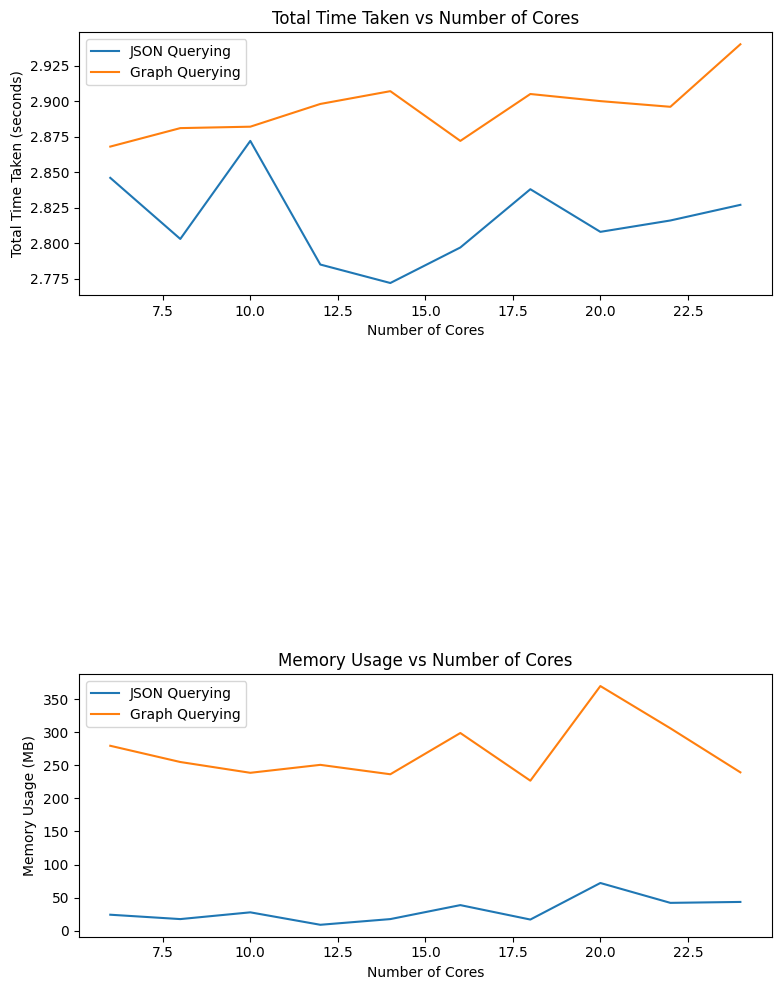

In [6]:
import matplotlib.pyplot as plt

# Sample data for JSON querying
json_cores = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
json_total_time = [2.846, 2.803, 2.872, 2.785, 2.772, 2.797, 2.838, 2.808, 2.816, 2.827]
# json_current_memory = []
# json_peak_memory = []
# json_cpu_usage = []
json_memory_usage = [24.3, 17.7, 27.9, 9.1, 17.7, 38.8, 17.0, 72.2, 42.2, 43.6]

# Sample data for Graph querying (assuming similar pattern)
graph_total_time = [2.868, 2.881, 2.882, 2.898, 2.907, 2.872, 2.905, 2.900, 2.896, 2.940]
# graph_current_memory = [65, 70, 72, 75, 77, 80, 78.5, 82, 85, 87]
# graph_peak_memory = [95, 100, 105, 108, 110, 112, 110.5, 115, 118, 120]
# graph_cpu_usage = [1.4, 1.5, 1.6, 1.7, 1.75, 1.8, 1.85, 1.9, 2.0, 2.05]
graph_memory_usage = [279.4, 254.9, 238.6, 250.6, 236.4, 298.7, 226.7, 369.6, 305.8, 239.3]

# Plotting the graphs
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.plot(json_cores, json_total_time, label='JSON Querying')
plt.plot(json_cores, graph_total_time, label='Graph Querying')
plt.xlabel('Number of Cores')
plt.ylabel('Total Time Taken (seconds)')
plt.title('Total Time Taken vs Number of Cores')
plt.legend()

# plt.subplot(3, 2, 2)
# plt.plot(json_cores, json_current_memory, label='JSON Querying')
# plt.plot(json_cores, graph_current_memory, label='Graph Querying')
# plt.xlabel('Number of Cores')
# plt.ylabel('Current Memory Usage (MB)')
# plt.title('Current Memory Usage vs Number of Cores')
# plt.legend()

# plt.subplot(3, 2, 3)
# plt.plot(json_cores, json_peak_memory, label='JSON Querying')
# plt.plot(json_cores, graph_peak_memory, label='Graph Querying')
# plt.xlabel('Number of Cores')
# plt.ylabel('Peak Memory Usage (MB)')
# plt.title('Peak Memory Usage vs Number of Cores')
# plt.legend()

# plt.subplot(3, 2, 4)
# plt.plot(json_cores, json_cpu_usage, label='JSON Querying')
# plt.plot(json_cores, graph_cpu_usage, label='Graph Querying')
# plt.xlabel('Number of Cores')
# plt.ylabel('CPU Usage (%)')
# plt.title('CPU Usage vs Number of Cores')
# plt.legend()

plt.subplot(3, 2, 5)
plt.plot(json_cores, json_memory_usage, label='JSON Querying')
plt.plot(json_cores, graph_memory_usage, label='Graph Querying')
plt.xlabel('Number of Cores')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs Number of Cores')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
